In [8]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from clustergram import Clustergram
import urbangrammar_graphics as ugg
import seaborn as sns
from kmodes.kprototypes import KPrototypes

In [9]:
df1 = pd.read_excel("input_data.xlsx", index_col=0 )
df1.head()

,product_name,contract_status,currency_name,duration,country,age,sex,price,insurance_amount,loss_payout_amt,price_usd,insurance_amount_usd,loss_payout_amt_usd,anomaly
contract_num,,,,,,,,,,,,,,
ТТЕ7227715*****,Страхование путешественников,Действует,Российский рубль,10,Беларусь,20,M,1096,2000000,0,12.41768,22660.000080,0.0,1
ТТЕ7227715*****,Страхование путешественников,Действует,Российский рубль,7,Индонезия,55,M,1918,5000000,0,21.73094,56650.000199,0.0,-1
БАДАМСТЕ55*****,Страхование путешественников,Действует,Российский рубль,10,Беларусь,61,F,1096,2000000,0,12.41768,22660.000080,0.0,-1
ТТЕ7227715*****,Страхование путешественников,Действует,Российский рубль,14,Грузия,25,M,1534,2000000,0,17.38022,22660.000080,0.0,1
ТТЕ7227715*****,Страхование путешественников,Действует,Российский рубль,7,Аргентина,33,M,1918,5000000,0,21.73094,56650.000199,0.0,-1


In [6]:
df = pd.read_excel("df_fin.xlsx", index_col=0 )
df.head()

,contract_status,currency_name,duration,age,sex,price,insurance_amount,loss_payout_amt,price_usd,insurance_amount_usd,...,country_Казахстан,country_Канада,country_ОАЭ,country_США,country_Сирия,country_Таиланд,country_Турция,country_Узбекистан,country_Франция,ouliers
0,0,1,10,20,1,1096,2000000,0,12.41768,22660.0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,7,55,1,1918,5000000,0,21.73094,56650.0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,10,61,0,1096,2000000,0,12.41768,22660.0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,14,25,1,1534,2000000,0,17.38022,22660.0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,7,33,1,1918,5000000,0,21.73094,56650.0,...,0,0,0,0,0,0,0,0,0,1


In [52]:
df.columns.tolist()

['contract_status',
 'currency_name',
 'duration',
 'age',
 'sex',
 'price',
 'insurance_amount',
 'loss_payout_amt',
 'price_usd',
 'insurance_amount_usd',
 'loss_payout_amt_usd',
 'country_Азербайджан',
 'country_Аргентина',
 'country_Армения',
 'country_Беларусь',
 'country_Болгария',
 'country_Великобритания',
 'country_Германия',
 'country_Грузия',
 'country_Египет',
 'country_Индонезия',
 'country_Иран',
 'country_Казахстан',
 'country_Канада',
 'country_ОАЭ',
 'country_США',
 'country_Сирия',
 'country_Таиланд',
 'country_Турция',
 'country_Узбекистан',
 'country_Франция',
 'ouliers']

In [54]:
# Список индексов числовых признаков
numeric_indices = [2,3,5,6,7,8,9,10]

# Список индексов категориальных признаков
categorical_indices = [0,1,4,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]

# Инициализация и обучение модели K-Prototypes
kproto = KPrototypes(n_clusters=5, init='Cao', verbose=2)
clusters = kproto.fit_predict(df, categorical=categorical_indices)

# Вывод результатов

print(clusters)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 8040012109630.351
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 0, ncost: 8040012109630.351
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializ

In [14]:
# Датасет с числовыми признаками
df_num = df[['duration', 'age', 'price', 'insurance_amount', 
            'loss_payout_amt', 'price_usd', 'insurance_amount_usd', 
            'loss_payout_amt_usd', 'ouliers' ]]

In [17]:
df_num.head() 


,duration,age,price,insurance_amount,loss_payout_amt,price_usd,insurance_amount_usd,loss_payout_amt_usd,ouliers
0,10,20,1096,2000000,0,12.41768,22660.0,0.0,1
1,7,55,1918,5000000,0,21.73094,56650.0,0.0,1
2,10,61,1096,2000000,0,12.41768,22660.0,0.0,1
3,14,25,1534,2000000,0,17.38022,22660.0,0.0,1
4,7,33,1918,5000000,0,21.73094,56650.0,0.0,1


In [18]:
scaler = StandardScaler()
df_ss = scaler.fit_transform(df_num)

In [19]:
df_ss

array([[-0.23503772, -1.82818865, -0.32154047, ..., -0.85781829,
        -0.05921675,  0.3677085 ],
       [-0.28497331,  1.38321345, -0.23550183, ...,  1.12756506,
        -0.05921675,  0.3677085 ],
       [-0.23503772,  1.93373953, -0.32154047, ..., -0.85781829,
        -0.05921675,  0.3677085 ],
       ...,
       [-0.15181174,  0.2821613 , -0.17814273, ..., -0.19602384,
        -0.05921675, -2.71954548],
       [ 0.09786623, -1.00239954,  0.07997321, ..., -0.19602384,
        -0.05921675, -2.71954548],
       [-0.28497331,  0.46566999, -0.23550183, ...,  1.12756506,
        -0.05921675,  0.3677085 ]])

In [20]:
tsne = TSNE(n_components=2)
df_tsne = tsne.fit_transform(df_ss)

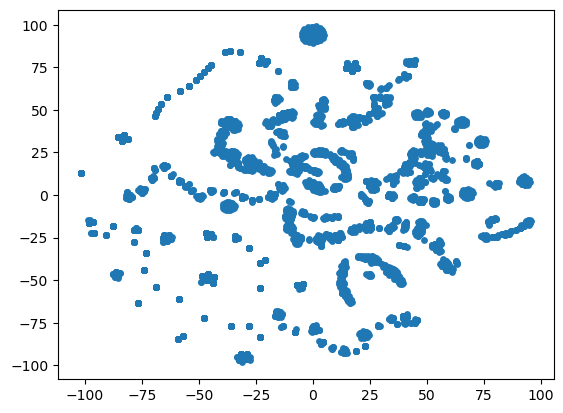

In [22]:
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], s=15)

In [23]:
clustering = AgglomerativeClustering().fit(df_ss)
np.unique(clustering.labels_)

array([0, 1], dtype=int64)

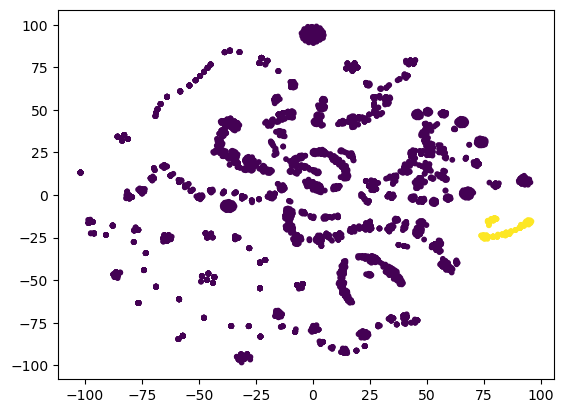

In [24]:
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], s=10, c=clustering.labels_)

In [29]:
clustering = AgglomerativeClustering(distance_threshold=None, n_clusters=5).fit(df_ss)

In [30]:
np.unique(clustering.labels_)

array([0, 1, 2, 3, 4], dtype=int64)

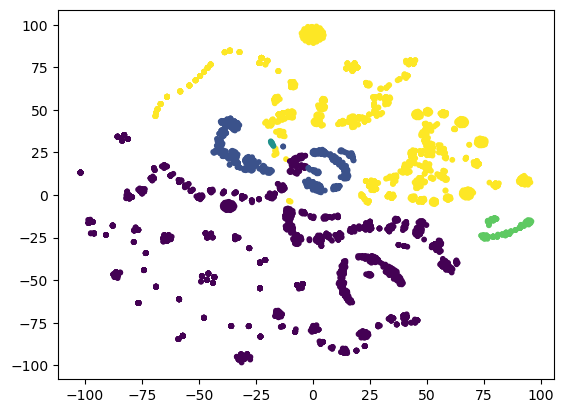

In [31]:
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], s=10, c=clustering.labels_)

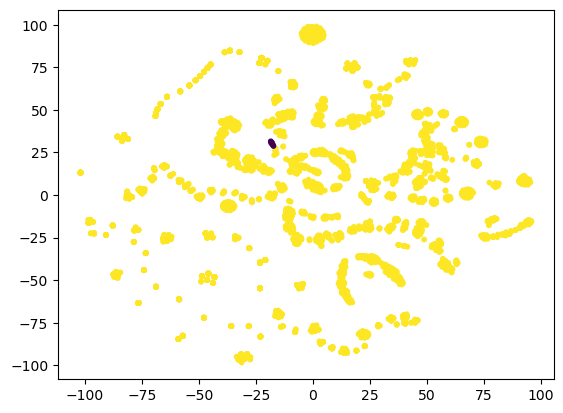

In [32]:
clustering = AgglomerativeClustering(linkage='average').fit(df_ss)
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], s=10, c=clustering.labels_)

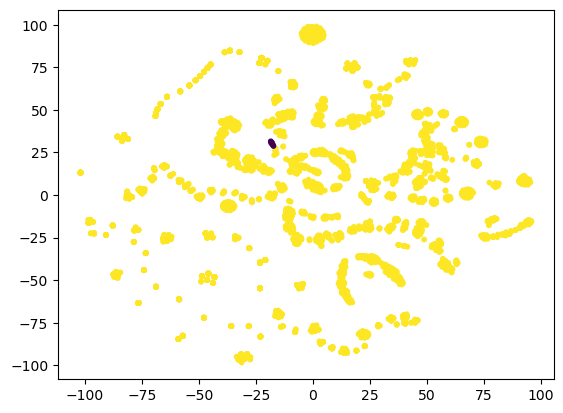

In [33]:
clustering = AgglomerativeClustering(linkage='complete').fit(df_ss)
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], s=10, c=clustering.labels_)

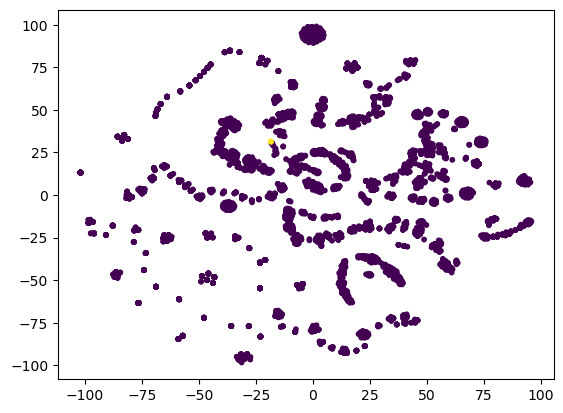

In [34]:
clustering = AgglomerativeClustering(linkage='single').fit(df_ss)
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], s=10, c=clustering.labels_)

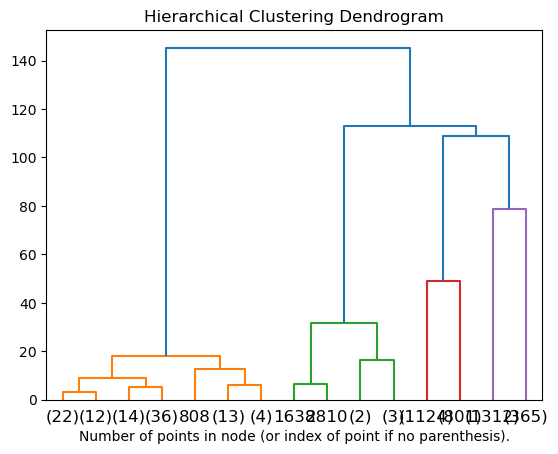

In [35]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    dendrogram(linkage_matrix, **kwargs)

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(df_ss)
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

d:\Program files\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Program files\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


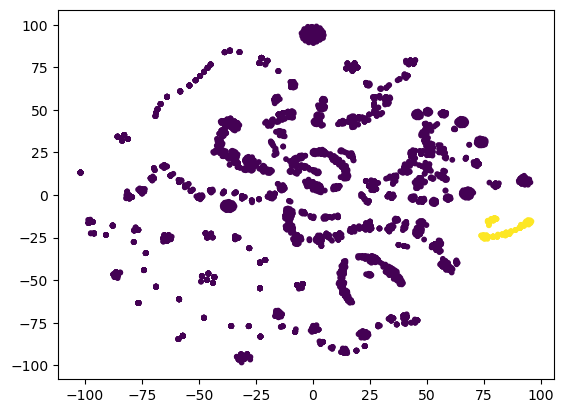

In [36]:
kmeans = KMeans(n_clusters=2).fit(df_ss)
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], s=10, c=kmeans.labels_)

In [37]:
inertia = []
silhouette = []
N = 15
for k in range(2, N):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(df_ss)
    preds = kmeans.predict(df_ss)
    inertia.append(np.sqrt(kmeans.inertia_))
    silhouette.append(silhouette_score(df_ss, preds))

d:\Program files\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Program files\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(
d:\Program files\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Program files\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.

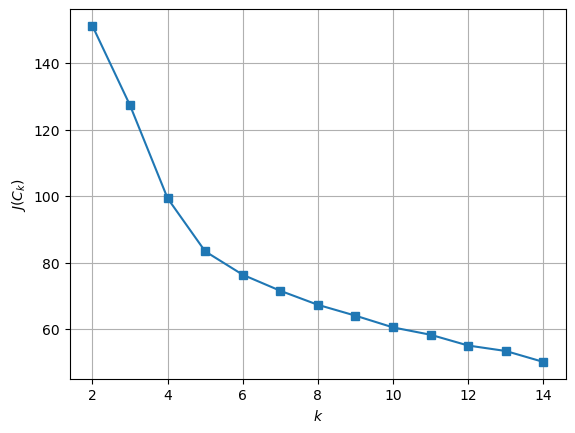

In [38]:
plt.plot(range(2, N), inertia, marker='s');
plt.xlabel('$k$')
plt.grid()
plt.ylabel('$J(C_k)$');

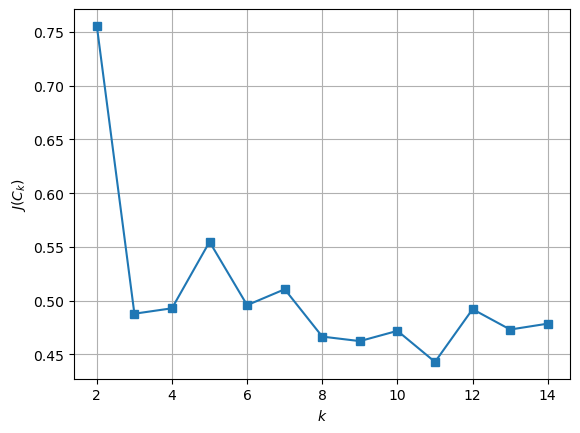

In [39]:
plt.plot(range(2, N), silhouette, marker='s');
plt.xlabel('$k$')
plt.grid()
plt.ylabel('$J(C_k)$');

d:\Program files\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Program files\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


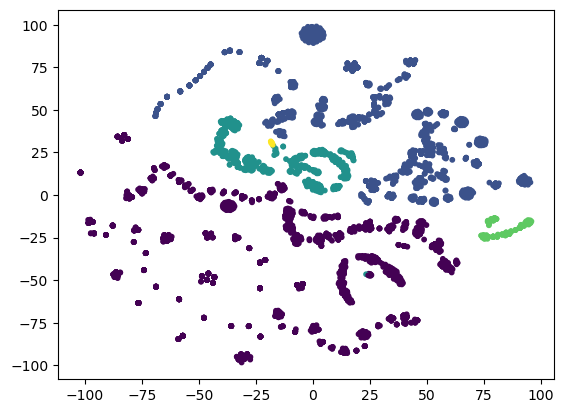

In [40]:
kmeans = KMeans(n_clusters=5).fit(df_ss)
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], s=10, c=kmeans.labels_)

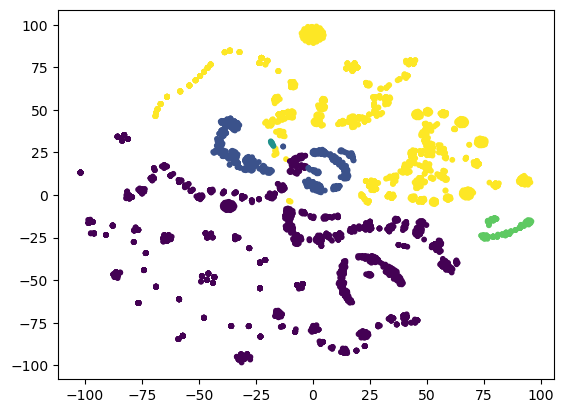

In [41]:
clustering = AgglomerativeClustering(n_clusters=5).fit(df_ss)
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], s=10, c=clustering.labels_)

d:\Program files\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
d:\Program files\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\semen\AppData\Local\Temp\ipykernel_18992\3089895410.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


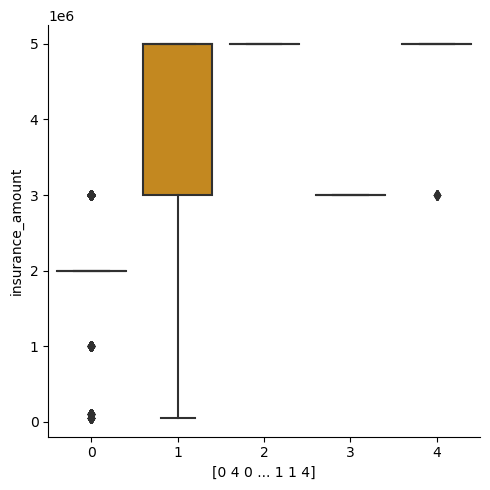

In [42]:
sns.catplot(kind='box', data=df_num,
            y='insurance_amount',
            x=clustering.labels_,
            palette="colorblind", sharey=False)
plt.tight_layout()
plt.show()

d:\Program files\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
d:\Program files\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\semen\AppData\Local\Temp\ipykernel_18992\3261366841.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


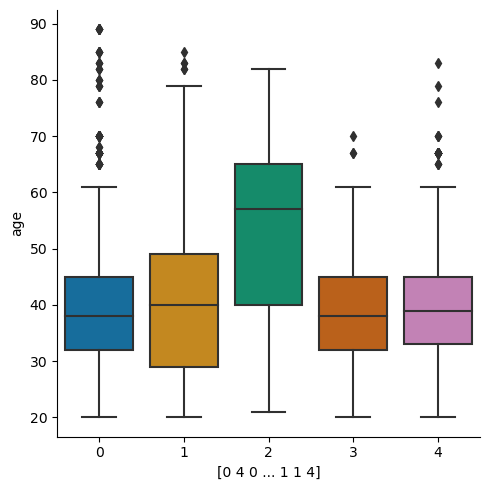

In [44]:
sns.catplot(kind='box', data=df_num,
            y='age',
            x=clustering.labels_,
            palette="colorblind", sharey=False)
plt.tight_layout()
plt.show()

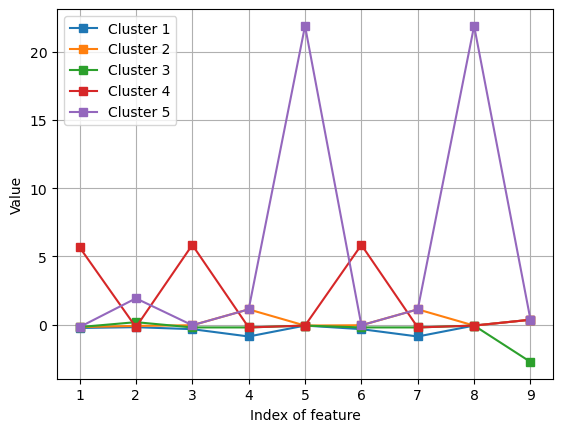

In [45]:
plt.plot(range(1, df_ss.shape[1]+1), np.median(df_ss[kmeans.labels_ == 0], axis=0), marker='s', label="Cluster 1");
plt.plot(range(1, df_ss.shape[1]+1), np.median(df_ss[kmeans.labels_ == 1], axis=0), marker='s', label="Cluster 2");
plt.plot(range(1, df_ss.shape[1]+1), np.median(df_ss[kmeans.labels_ == 2], axis=0), marker='s', label="Cluster 3");
plt.plot(range(1, df_ss.shape[1]+1), np.median(df_ss[kmeans.labels_ == 3], axis=0), marker='s', label="Cluster 4");
plt.plot(range(1, df_ss.shape[1]+1), np.median(df_ss[kmeans.labels_ == 4], axis=0), marker='s', label="Cluster 5");
plt.legend()
plt.xlabel('Index of feature')
plt.grid()
plt.ylabel('Value');

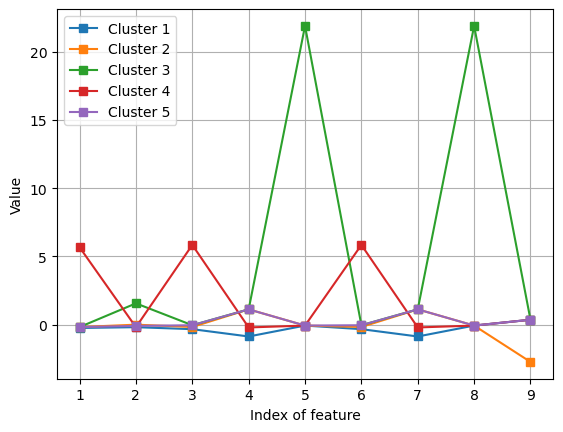

In [46]:
plt.plot(range(1, df_ss.shape[1]+1), np.median(df_ss[clustering.labels_ == 0], axis=0), marker='s', label="Cluster 1");
plt.plot(range(1, df_ss.shape[1]+1), np.median(df_ss[clustering.labels_ == 1], axis=0), marker='s', label="Cluster 2");
plt.plot(range(1, df_ss.shape[1]+1), np.median(df_ss[clustering.labels_ == 2], axis=0), marker='s', label="Cluster 3");
plt.plot(range(1, df_ss.shape[1]+1), np.median(df_ss[clustering.labels_ == 3], axis=0), marker='s', label="Cluster 4");
plt.plot(range(1, df_ss.shape[1]+1), np.median(df_ss[clustering.labels_ == 4], axis=0), marker='s', label="Cluster 5");
plt.legend()
plt.xlabel('Index of feature')
plt.grid()
plt.ylabel('Value');

d:\Program files\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Program files\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


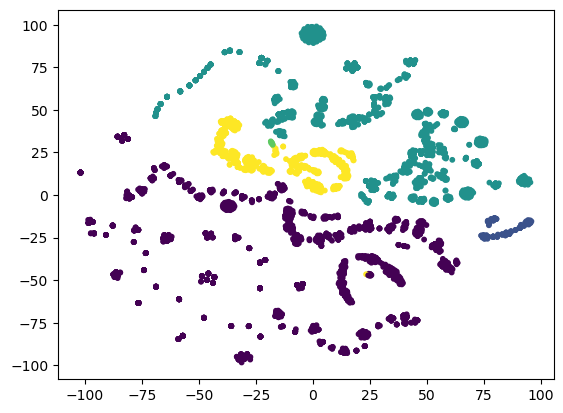

In [48]:
kmeans = KMeans(n_clusters=5).fit(df_ss)
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], s=10, c=kmeans.labels_)

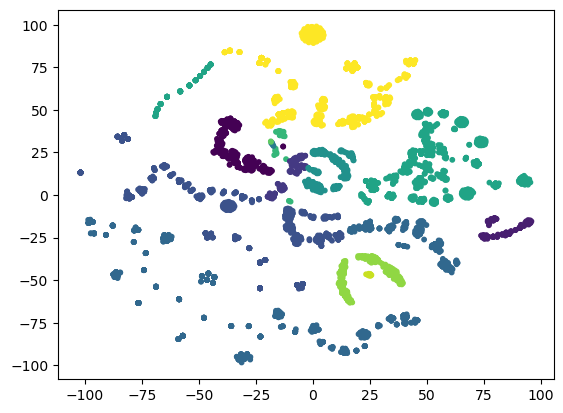

In [49]:
clustering = AgglomerativeClustering(n_clusters=13).fit(df_ss)
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], s=10, c=clustering.labels_)

K=1 skipped. Mean computed from data directly.


d:\Program files\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


K=2 fitted in 48.696 seconds.


d:\Program files\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


K=3 fitted in 57.621 seconds.


d:\Program files\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


K=4 fitted in 38.349 seconds.


d:\Program files\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


K=5 fitted in 41.453 seconds.


d:\Program files\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


K=6 fitted in 44.254 seconds.


d:\Program files\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


K=7 fitted in 47.531 seconds.


d:\Program files\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


K=8 fitted in 45.601 seconds.


d:\Program files\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


K=9 fitted in 46.222 seconds.


Text(0.5, 1.0, 'K-Means (scikit-learn)')

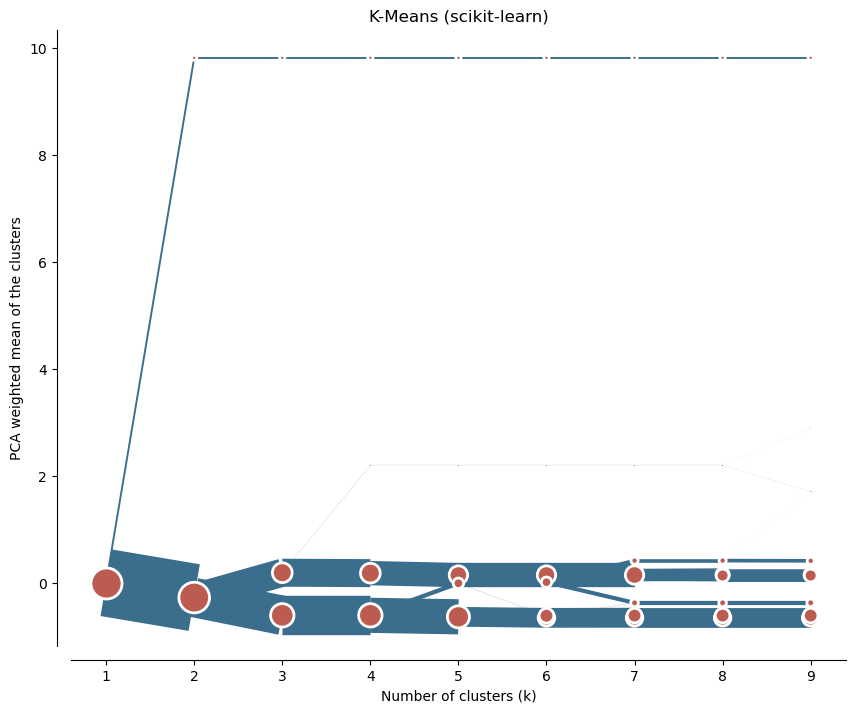

In [50]:
cgram = Clustergram(range(1, 10), n_init=1000)
cgram.fit(df_ss)

ax = cgram.plot(
    figsize=(10, 8),
    line_style=dict(color=ugg.COLORS[1]),
    cluster_style={"color": ugg.COLORS[2]},
)
ax.yaxis.grid(False)
sns.despine(offset=10)
ax.set_title('K-Means (scikit-learn)')

Text(0.5, 1.0, 'Hierarchical (scikit-learn)')

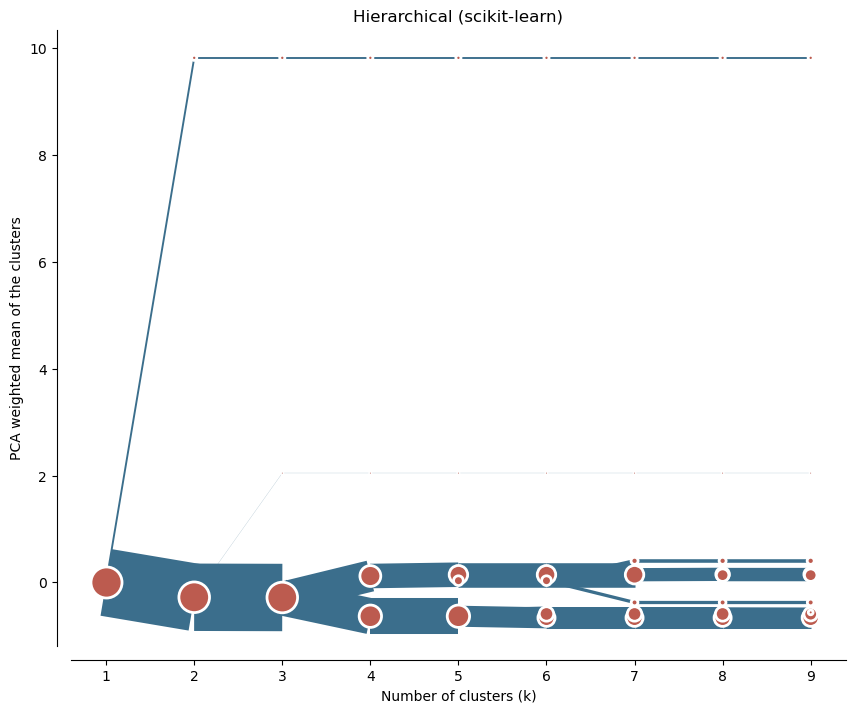

In [51]:
cgram = Clustergram(range(1, 10), method='hierarchical', linkage='ward')
cgram.fit(df_ss)

ax = cgram.plot(
    figsize=(10, 8),
    line_style=dict(color=ugg.COLORS[1]),
    cluster_style={"color": ugg.COLORS[2]},
)
ax.yaxis.grid(False)
sns.despine(offset=10)
ax.set_title('Hierarchical (scikit-learn)')